# Drug Prescription


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Downloading the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


#### Importing necessary Libraries 

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#### Loading Dataset 

In [2]:
my_data=pd.read_csv("Drug prescription Dataset.csv", delimiter=",")

#### Viewing First 5 rows of dataframe

In [3]:
my_data[0:5]

,disease,age,gender,severity,drug
0,diarrhea,4,male,LOW,promegranate drink
1,diarrhea,4,male,NORMAL,lime juice
2,diarrhea,5,male,LOW,promegranate drink
3,diarrhea,5,male,NORMAL,lime juice
4,diarrhea,6,male,LOW,promegranate drink


#### Checking the shape of dataset

In [4]:
my_data.shape

(736, 5)

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


#### Checking for Duplicate values

In [5]:
duplicate = my_data.duplicated()
 
print("Duplicate Rows :")
 
# Displaying the resultant Dataframe
duplicate

Duplicate Rows :


0      False
1      False
2      False
3      False
4      False
       ...  
731    False
732    False
733    False
734    False
735    False
Length: 736, dtype: bool

#### Removing duplicate values 

In [6]:
duplicate_vals = my_data.drop_duplicates()
duplicate_vals

,disease,age,gender,severity,drug
0,diarrhea,4,male,LOW,promegranate drink
1,diarrhea,4,male,NORMAL,lime juice
2,diarrhea,5,male,LOW,promegranate drink
3,diarrhea,5,male,NORMAL,lime juice
4,diarrhea,6,male,LOW,promegranate drink
...,...,...,...,...,...
731,diarrhea,31,male,NORMAL,kutajarishta
732,diarrhea,31,male,LOW,fenugreek seed
733,diarrhea,31,female,HIGH,sitopaladi churna
734,diarrhea,31,female,NORMAL,kutajarishta


#### Checking the dataset shape after removing duplicates

In [7]:
my_data.shape

(736, 5)

#### Removing the column containing the target name since it doesn't contain numeric values.


In [8]:
X = my_data[["disease","age","gender","severity"]].values
X[0:5]

array([['diarrhea', 4, 'male', 'LOW'],
       ['diarrhea', 4, 'male', 'NORMAL'],
       ['diarrhea', 5, 'male', 'LOW'],
       ['diarrhea', 5, 'male', 'NORMAL'],
       ['diarrhea', 6, 'male', 'LOW']], dtype=object)

#### Checking for Null Values

In [9]:
my_data.isnull().sum()

disease     0
age         0
gender      0
severity    0
drug        0
dtype: int64

#### Another method for checking Null Values 

In [10]:
my_data.isnull().values.any()

False

#### Filling the target variable(Class).


In [11]:
y = my_data["drug"]
y[0:10]

0    promegranate drink
1            lime juice
2    promegranate drink
3            lime juice
4    promegranate drink
5            lime juice
6    promegranate drink
7            lime juice
8    promegranate drink
9            lime juice
Name: drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>

#### Setting a random seed for reproducibility

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
import numpy as np
# set random seed for reproducibility
np.random.seed(42)

# load your data
X = my_data[["disease","age","gender","severity"]].values # your feature data
y = my_data["drug"].values # your target data

#### Converting categorical variable into dummy/indicator variables. (Preprocessing)


In [14]:
from sklearn import preprocessing
le_disease = preprocessing.LabelEncoder()
le_disease.fit([  'diarrhea','gastritis','osteoarthritis','rheumatoid arthritis','migraine'])
X[:,0] = le_disease.transform(X[:,0])

le_gender = preprocessing.LabelEncoder()
le_gender.fit(['female','male'])
X[:,2] = le_gender.transform(X[:,2]) 

  # le_age = preprocessing.LabelEncoder()
  # le_age.fit([   '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13', '14', '15', '16', '17' ,'18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
  # '28', '29', '30', '31'])
  # X[:,1] = le_age.transform(X[:,1])

le_severity = preprocessing.LabelEncoder()
le_severity.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,3] = le_severity.transform(X[:,3])




X[0:5]

array([[0, 4, 1, 1],
       [0, 4, 1, 2],
       [0, 5, 1, 1],
       [0, 5, 1, 2],
       [0, 6, 1, 1]], dtype=object)

In [15]:
#  max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [16]:
# from sklearn.model_selection import cross_val_score

# for max_depth in max_depth_values:
#     model = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
#     scores = cross_val_score(model, X, y, cv=10)
#     mean_score = scores.mean()
#     print("max_depth = ", max_depth, ":", "mean accuracy = ", mean_score*100 )

#### Split train and test data

In [17]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=1)

#### Saving the train data as a CSV file

In [18]:
# Save the train data as a CSV file
train_data = pd.DataFrame(X_trainset)
train_data['target'] = y_trainset
train_data.to_csv('train_data.csv', index=False)

#### Saving test Data as CSV file

In [19]:
# Save the test data as a CSV file
test_data = pd.DataFrame(X_testset)
test_data['target'] = y_testset
test_data.to_csv('test_data.csv', index=False)

#### Printing the shape of X_trainset and y_trainset. Ensure that the dimensions match


In [20]:
print(X_trainset.shape)
print(y_trainset.shape)

(515, 4)
(515,)


#### Print the shape of X_testset and y_testset. Ensure that the dimensions match


In [21]:
print(X_testset.shape)
print(y_testset.shape)


(221, 4)
(221,)


#### Checking for any null values in both test and train dataset after spliting   

In [22]:
test_data.isnull().values.any()

False

In [23]:
train_data.isnull().values.any()

False

<hr>

<div id="modeling">
    <h2>Modeling</h2>
</div>


In [24]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=6)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [25]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [26]:
predTree = drugTree.predict(X_testset)

In [27]:
train = drugTree.predict(X_trainset)

we can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.


In [28]:
print (predTree [0:20])
print (y_testset [0:20])


['tribhuvan kirti rasa' 'indukantham kashayam' 'Shankha prakshalana'
 'Shankha prakshalana' 'sanjivani vati' 'mukta pishti' 'giloy satya'
 'fenugreek seed' 'giloy satya' 'akik pishti' 'giloy satya' 'mukta pishti'
 'Jyotishmati' 'ajamodarka' 'ricinus communis' 'promegranate drink'
 'ricinus communis' 'lime juice' 'gulachyadi kashayam'
 'Vasant Kusumakar Ras']
['tribhuvan kirti rasa' 'indukantham kashayam' 'Shankha prakshalana'
 'Shankha prakshalana' 'sanjivani vati' 'mukta pishti' 'giloy satya'
 'fenugreek seed' 'giloy satya' 'akik pishti' 'giloy satya' 'mukta pishti'
 'Jyotishmati' 'lavanaabhaskara churna' 'ricinus communis'
 'promegranate drink' 'ricinus communis' 'mrutyunjay rasa'
 'gulachyadi kashayam' 'Vasant Kusumakar Ras']


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    
    
</div>

#### Testing Accuracy

In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt
predictions_test =  metrics.accuracy_score(y_testset, predTree)
print("DecisionTrees's Testing Accuracy: ",predictions_test)

DecisionTrees's Testing Accuracy:  0.8506787330316742


#### Calculating the accuracy score without sklearn


In [30]:
correct_labels=(predTree==y_testset).sum()
total_labels=y_testset.shape[0]
print("Testing Accuracy:",(correct_labels/total_labels))

Testing Accuracy: 0.8506787330316742


#### Training Accuracy of the model

In [31]:
from sklearn.metrics import accuracy_score
predictions_train = drugTree.predict(X_trainset)
Train_acc = accuracy_score(y_trainset,predictions_train)
print("DecisionTrees's Training Accuracy: ",Train_acc)

DecisionTrees's Training Accuracy:  0.9242718446601942


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>


In [32]:
# install the pydotplus and graphviz libraries 
# pip install pydotplus


In [33]:
from six import StringIO
import pydotplus
import graphviz
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

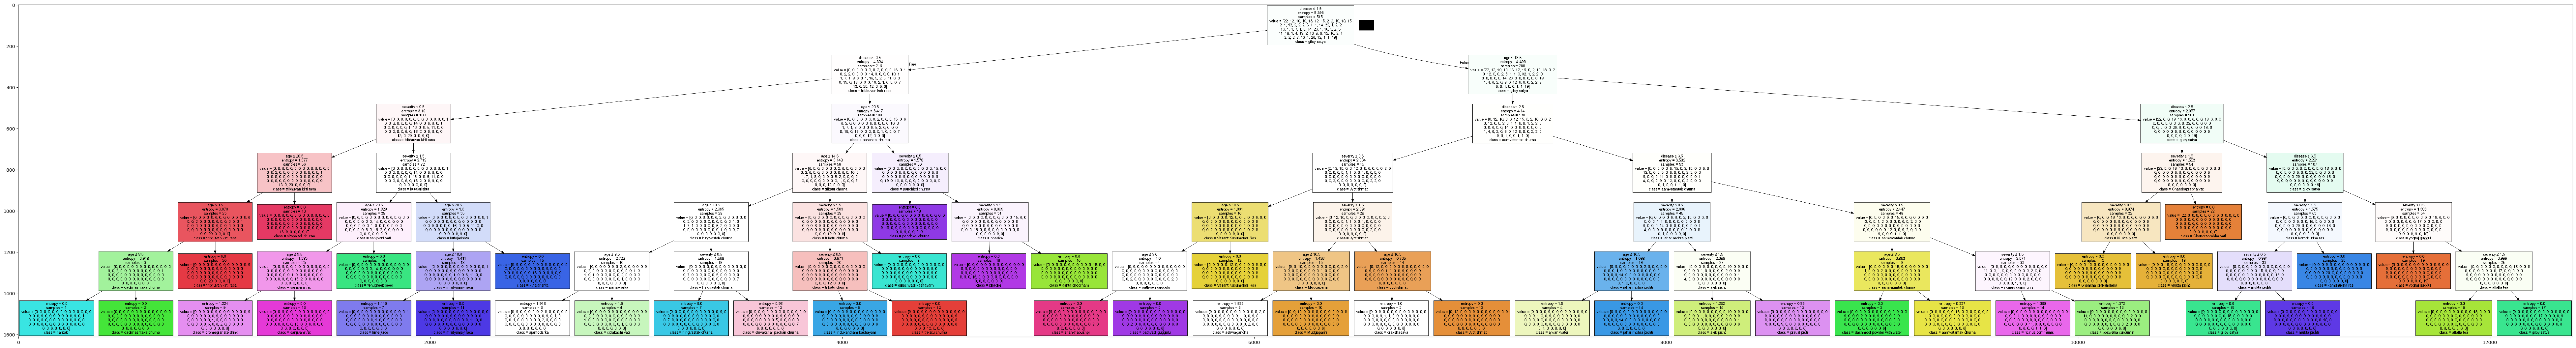

In [34]:
dot_data = StringIO()
filename = "drugTree.png"
featureNames = my_data.columns[0:4]
targetNames = my_data["drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Evaluating our test dataset

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_testset, predTree, zero_division = 1))
# Generating the confusion matrix for evaluating the testing corpus
conf_matrix = confusion_matrix(y_testset, predTree)
print("Confusion Matrix:")
print(conf_matrix)

                            precision    recall  f1-score   support

        Chandraprabha vati       1.00      1.00      1.00         4
               Jyotishmati       1.00      1.00      1.00         4
                Mudgaparni       1.00      1.00      1.00         6
              Mukta pishti       1.00      1.00      1.00         7
       Shankha prakshalana       1.00      1.00      1.00        13
      Vasant Kusumakar Ras       1.00      1.00      1.00         4
        aamvatantak churna       0.75      1.00      0.86         3
                ajamodarka       0.00      1.00      0.00         0
               ajwan water       0.00      1.00      0.00         0
               akik pishti       0.75      1.00      0.86         6
               alfalfa tea       1.00      1.00      1.00         8
            ashta choornam       1.00      1.00      1.00         7
               ashwagandha       0.00      1.00      0.00         0
                     bilwa       1.00      0.00

# Evaluating our Training dataset

In [37]:
print(classification_report(y_trainset,predictions_train, zero_division = 1))
# Generating the confusion matrix for evaluating the training corpus
from sklearn.metrics import confusion_matrix
 
predictions_train = drugTree.predict(X_trainset)
confusion_matrix_train = confusion_matrix(y_trainset, predictions_train)
print("Confusion matrix (training):\n", confusion_matrix_train)

                            precision    recall  f1-score   support

        Chandraprabha vati       1.00      1.00      1.00        22
               Jyotishmati       1.00      1.00      1.00        12
                Mudgaparni       1.00      1.00      1.00        10
              Mukta pishti       1.00      1.00      1.00        19
       Shankha prakshalana       1.00      1.00      1.00        13
      Vasant Kusumakar Ras       1.00      1.00      1.00        12
        aamvatantak churna       0.94      1.00      0.97        15
                ajamodarka       0.33      1.00      0.50         2
               ajwan water       0.50      1.00      0.67         2
               akik pishti       0.71      1.00      0.83        10
               alfalfa tea       1.00      1.00      1.00        18
            ashta choornam       1.00      1.00      1.00        15
               ashwagandha       0.40      1.00      0.57         2
                     bilwa       1.00      0.00

### Visualizing Confusion Matrix

In [38]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
conf_matrix = confusion_matrix(y_testset, predTree )
print(conf_matrix)

[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 7]]


Train score 0.9242718446601942
Test score 0.8506787330316742


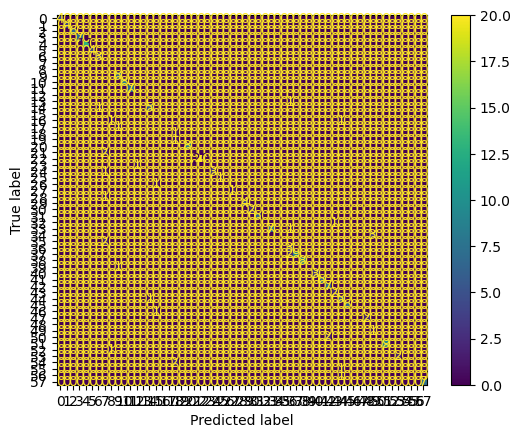

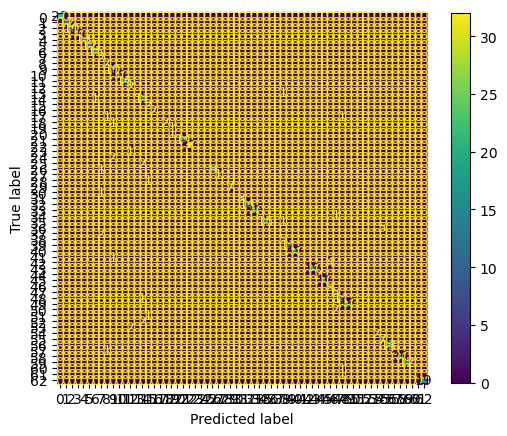

In [40]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
print(f'Train score {accuracy_score(train,y_trainset)}')
print(f'Test score {accuracy_score(predTree,y_testset)}')
conf_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_train = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_train)
conf_test.plot()
conf_train.plot()

In [58]:
import pickle 
pickle.dump(drugTree,open("drugTree.pkl","wb"))

In [59]:
model = pickle.load(open("drugTree.pkl","rb"))
model.predict(X_testset)

array(['tribhuvan kirti rasa', 'indukantham kashayam',
       'Shankha prakshalana', 'Shankha prakshalana', 'sanjivani vati',
       'mukta pishti', 'giloy satya', 'fenugreek seed', 'giloy satya',
       'akik pishti', 'giloy satya', 'mukta pishti', 'Jyotishmati',
       'ajamodarka', 'ricinus communis', 'promegranate drink',
       'ricinus communis', 'lime juice', 'gulachyadi kashayam',
       'Vasant Kusumakar Ras', 'mukta pishti', 'mrutyunjay rasa',
       'giloy satya', 'ajamodarka', 'jahar mohra pishti',
       'shivakshar pachan churna', 'akik pishti', 'alfalfa tea',
       'Shankha prakshalana', 'citrakadhi vati', 'kamdhudha ras',
       'kamdhudha ras', 'yograj guggul', 'kutajarishta',
       'Shankha prakshalana', 'Mukta pishti', 'Mudgaparni',
       'ashta choornam', 'aamvatantak churna', 'giloy satya',
       'fenugreek seed', 'ricinus communis', 'fenugreek seed',
       'yograj guggul', 'akik pishti', 'kutajarishta', 'giloy satya',
       'kutajarishta', 'shankhapushpi', '

In [60]:
print(model.predict([[1, 19, 1, 0]]))

['indukantham kashayam']
